In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pingouin as pg


sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [4]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

In [5]:
exp_1= pd.read_csv('5_task_1.csv')

In [6]:
exp_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [7]:
# Проверяем, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.
pg.homoscedasticity(data=exp_1, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


p-value > 0.05, не отклоняем нулевую гипотезу

### Проверить данные на нормальность. Сверка результата с qq-графиками.

In [8]:
pg.normality(data=exp_1, dv="events", group="group", method="shapiro") #чувствителен к размеру выборки

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
A,0.998942,0.000004,False
B,0.999016,0.000011,False
C,0.998921,0.000003,False


In [9]:
pg.normality(data=exp_1, dv="events", group="group", method="normaltest") #для крупных выборок

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


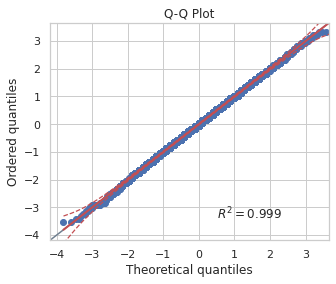

In [10]:
#qq-plots
pg.qqplot(exp_1.query('group=="A"').events)

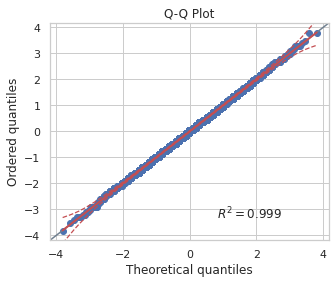

In [11]:
pg.qqplot(exp_1.query('group=="B"').events)

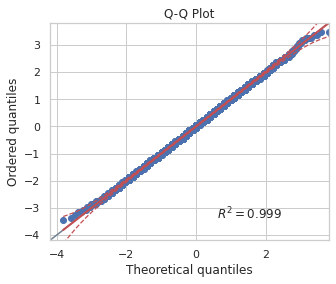

In [12]:
pg.qqplot(exp_1.query('group=="C"').events)

### Проведение однофакторного дисперсионного анализа

In [14]:
st.f_oneway(exp_1.query('group=="A"').events,
           exp_1.query('group=="B"').events,
           exp_1.query('group=="C"').events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [15]:
pg.anova(data=exp_1, dv="events", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


### Используем критерий Тьюки и определяем, между какими группами есть статистически значимые различия. 

In [17]:
MultiComp= MultiComparison(exp_1['events'], groups=exp_1['group'])

print(MultiComp.tukeyhsd().summary()) #проводим попарное тестирование

#все группы статистически различаются

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


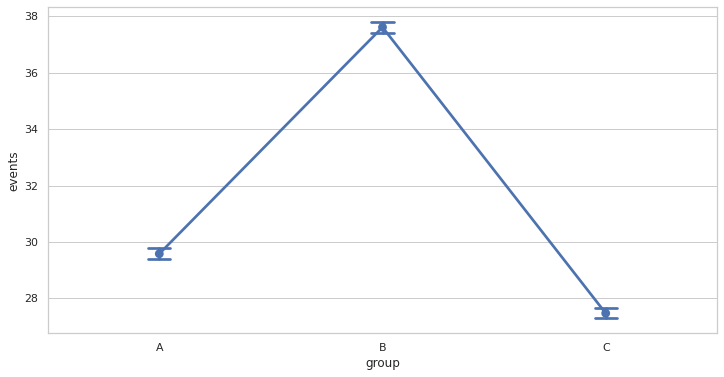

In [18]:
#визуализируем для удобства
sns.pointplot(x='group', y='events', data=exp_1, capsize=.1)